In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, color, img_as_ubyte
from scipy.ndimage import morphology

In [2]:
img = img_as_ubyte(color.rgb2gray(io.imread('test.jpg')))

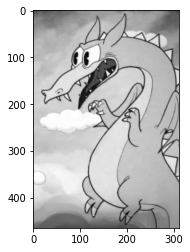

In [3]:
plt.imshow(img, cmap=plt.cm.gray)

In [4]:
img.shape

(465, 312)

In [5]:
morphology.grey_erosion(img, structure=np.ones((5, 5))).shape

(465, 312)

In [6]:
def grey_erosion(img, structure):
    y, x = img.shape
    s_y, s_x = structure.shape
    result = np.zeros_like(img)
    for i in range(y):
        for j in range(x):
            result[i, j] = (img[max(i - s_y // 2, 0):min(i + s_y // 2 + 1, y),
                                max(j - s_x // 2, 0):min(j + s_x // 2 + 1, x)] -
                            structure[max(s_y // 2 - i, 0):min(s_y // 2 - (i - y), s_y),
                                      max(s_x // 2 - j, 0):min(s_x // 2 - (j - x), s_x)]).min()
    return result

def grey_dilation(img, structure):
    y, x = img.shape
    s_y, s_x = structure.shape
    result = np.zeros_like(img)
    for i in range(y):
        for j in range(x):
            result[i, j] = (img[max(i - s_y // 2, 0):min(i + s_y // 2 + 1, y),
                                max(j - s_x // 2, 0):min(j + s_x // 2 + 1, x)] +
                            structure[max(s_y // 2 - i, 0):min(s_y // 2 - (i - y), s_y),
                                      max(s_x // 2 - j, 0):min(s_x // 2 - (j - x), s_x)]).max()
    return result

In [7]:
def grey_opening(img, structure):
    return grey_dilation(grey_erosion(img, structure), structure)

def grey_closing(img, structure):
    return grey_erosion(grey_dilation(img, structure), structure)

def tophat(img, structure):
    return img - grey_opening(img, structure)

def morph_gradient(img, structure):
    return grey_dilation(img, structure) - grey_erosion(img, structure)

tophat выделяет на изображении объекты размером со структурный элемент. (На последнем примере видно "вырезанные" из выделенных объектов квадраты 7x7 (например, на хребте или у основания правого крыла) и большего размера - они достаточно однородны, чтобы результат преобразования был близок к нулю.

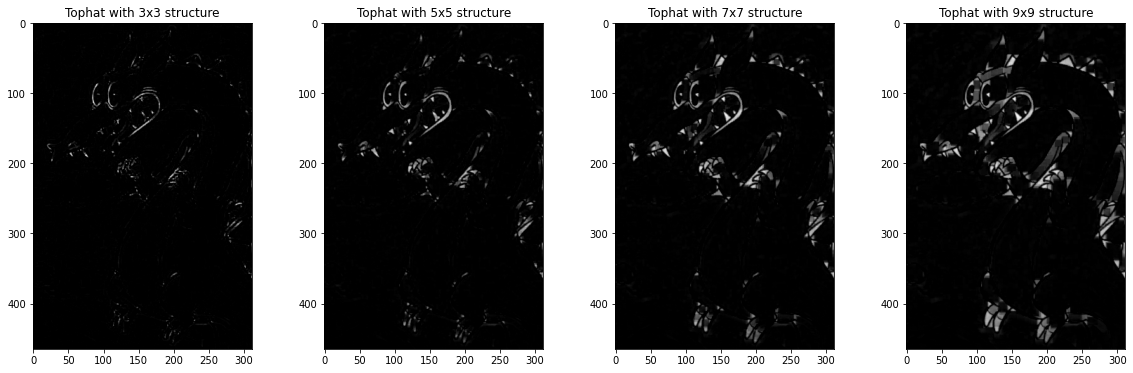

In [8]:
plt.figure(figsize=(20, 6))

for i in range(1, 5):
    plt.subplot(1, 4, i)
    s_size = 1 + 2 * i
    plt.title('Tophat with {0}x{0} structure'.format(s_size))
    plt.imshow(tophat(img, np.ones((s_size, s_size))), cmap=plt.cm.gray)

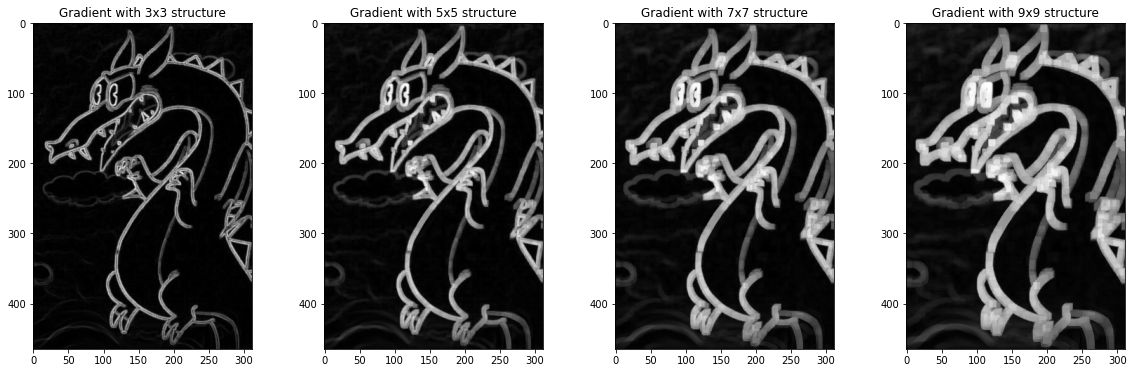

In [9]:
plt.figure(figsize=(20, 6))

for i in range(1, 5):
    plt.subplot(1, 4, i)
    s_size = 1 + 2 * i
    grad = morph_gradient(img, np.ones((s_size, s_size)))
    plt.title('Gradient with {0}x{0} structure'.format(s_size))
    plt.imshow(grad, cmap=plt.cm.gray)

In [11]:
rombic_structure = np.array([[0, 0, 1, 0, 0],
                             [0, 1, 1, 1, 0],
                             [1, 1, 1, 1, 1],
                             [0, 1, 1, 1, 0],
                             [0, 0, 1, 0, 0]])

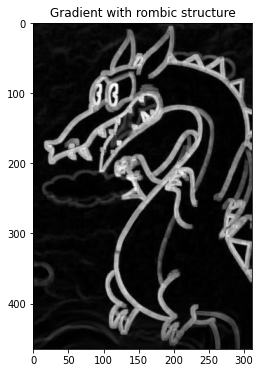

In [12]:
plt.figure(figsize=(5, 6))
plt.imshow(morph_gradient(img, rombic_structure), cmap=plt.cm.gray)
plt.title('Gradient with rombic structure')
plt.show()

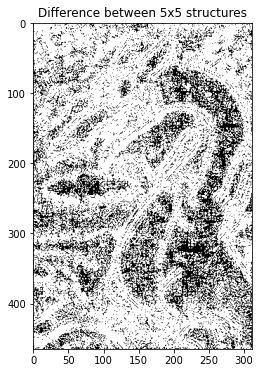

In [13]:
plt.figure(figsize=(5, 6))
plt.imshow(np.abs(morph_gradient(img, rombic_structure) -
                  morph_gradient(img, np.ones((5, 5)))), cmap=plt.cm.gray)
plt.title('Difference between 5x5 structures')
plt.show()